# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Решение**

1. Поскольку сумма любых двух весов больше оставшегося третьего, то для того, чтобы композиция трех алгоритмов ошиблась, нужно, чтобы ошиблись два любых алгоритма. Значит, итоговая вероятность -- это сумма вреоятностей всех случаев, когда ошибаются два алгоритма:

$$p_{error} = 3 \cdot (1 - p) \cdot p \cdot p + p \cdot p \cdot p = p^2(3(1 - p) + p) = p^2(3 - 2p)$$

2. Сумма первого и третьего весов меньше, чем сумма второго. Значит, вероятность ошибки композиции трех алгоритмов равна вероятного ошибки второго алгоритма:

$$p_{error} = p$$


### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

**Решение**

(Воспользуемся материалами с семинаров по машинному обучения Евгения Соколова: https://github.com/esokolov/ml-course-msu/blob/master/ML15-spring/lecture-notes/Sem03_ensembles.pdf)


$$s_i = - \frac{\partial L(y, z)}{\partial z} \bigm\vert_{z=a_{N-1}(x_i)},$$
где  $a_{N-1}$ -- уже построенная композиция из $N-1$ алгоритма и
$$\frac{\partial L(y, z)}{\partial z} = -\left(\frac{y}{z} - \frac{1-y}{1-z}\right)$$

$$b_N = \arg\min_{b \in \mathcal{B}} \left(\sum_{i=1}^l (b(x_i) - s_i)^2\right),$$
где $\mathcal{B}$ -- некоторое семейство, в котором лежат базовые алгоритмы $b_j$.

После того, как базовый алгоритм найден, коэффициент при нем находим так:
$$\gamma_N = \arg\min_{\gamma \in \mathcal{R}} \left(\sum_{i=1}^N L(y_i, a_{N-1}(x_i) + \gamma b_N(x_i))\right)$$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

**Решение**

$$err_n = \dfrac{\sum_{i=1}^lw_i^{(n)}I(y_i \not=G_m(x_i))}{\sum_{i=1}^lw_i^{(n)}} = \dfrac{w_j^{(n)}}{\sum_{i=1}^lw_i^{(n)}}$$

$$\alpha_n = \log\left(\dfrac{1-err_n}{err_n}\right)$$

$$w_{i}^{(n)} = exp(-y_i \sum_{k=1}^{n-1}\alpha_k b_k(x_i))$$
Поскольку ошибка была тольно на одном объекте, то и изменяться будет вес только на нем:
$$w_j^{(n+1)} = w_j^{(n)}exp(\alpha_n) = w_j^{(n)}\dfrac{1-err_n}{err_n} = w_j^{(n)}\dfrac{\sum_{i=1}^lw_i^{(n)} - w_j^{(n)}}{w_j^{(n)}} = \sum_{i=1}^lw_i^{(n)} - w_j^{(n)} $$
Поскольку остальные веса не менялись, сумма $\sum_{i=1}^lw_i^{(n+1)} - w_j^{(n+1)}$ остальных весов равна: $$\sum_{i=1}^lw_i^{(n)} - w_j^{(n)}$$

Теперь отнормируем:
$$\widetilde{w_j^{(n+1)}}= \frac{w_j^{(n+1)}}{\sum_{i=1}^{l} w_i^{(n + 1)}} = \frac{\sum_{i=1}^lw_i^{(n)} - w_j^{(n)}}{\left(\sum_{i=1}^lw_i^{(n)} - w_j^{(n)}\right) + \left(\sum_{i=1}^lw_i^{(n)} - w_j^{(n)}\right)} = \dfrac{1}{2} \leftarrow \text{ответ}$$


## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [14]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter


In [15]:
def bagging(X, y, size):
    #Implement random sampling here
    if size is None:
        size = X.shape[0]
        
    index = np.random.randint(X.shape[0], size=size)
    sample_X = X[index, :]
    sample_y = y[index]
    return sample_X, sample_y

In [16]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, max_features, num_trees=10, max_depth=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    

    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        for i in np.arange(self.num_trees):
            cur_sample_X, cur_sample_y = bagging(X_train, y_train, size=X_train.shape[0])
            
            cur_clf = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth,
                                                   max_features=self.max_features)
            cur_clf.fit(cur_sample_X, cur_sample_y)
            self.trees.append(cur_clf) 

        return self
    
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred_for_trees = np.zeros((self.num_trees, X_test.shape[0]))
        y_pred = np.zeros(X_test.shape[0])
        for i in np.arange(self.num_trees):
            y_pred_for_trees[i] = self.trees[i].predict(X_test)
        for i in np.arange(X_test.shape[0]):
            y_pred[i] = Counter(y_pred_for_trees[:, i]).most_common(1)[0][0]

        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [72]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('Class Alcohol Malic_acid Ash Alcalinity_of_ash Magnesium Total_phenols Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity Hue OD280_OD315_of_diluted_wines Proline')
data.columns = columns.split()

In [73]:
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.2, random_state=42)

In [97]:
my_random_forest = RandomForest(num_trees=10, max_features=int(X_train.shape[1] ** 0.5))
my_random_forest.fit(X_train.as_matrix(), Y_train.as_matrix())

RandomForest(criterion='gini', max_depth=None, max_features=3, num_trees=10)

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

In [98]:
trees_grid = np.arange(5, 101, 1)
train_accuracy_custom = []
test_accuracy_custom = []

for ntrees in trees_grid:
    cur_random_forest = RandomForest(num_trees=ntrees, max_features=int(X_train.shape[1] ** 0.5))
    cur_random_forest.fit(X_train.as_matrix(), Y_train.as_matrix())
    train_accuracy_custom.append(accuracy_score(Y_train, cur_random_forest.predict(X_train.as_matrix())))
    test_accuracy_custom.append(accuracy_score(Y_test, cur_random_forest.predict(X_test.as_matrix())))
    

In [99]:
# for ntrees, train_acc, test_acc in zip(trees_grid, train_accuracy, test_accuracy):
#     print("For %d trees train accuracy: %0.3f and test accuracy:  %0.3f " % (ntrees, train_acc, test_acc))

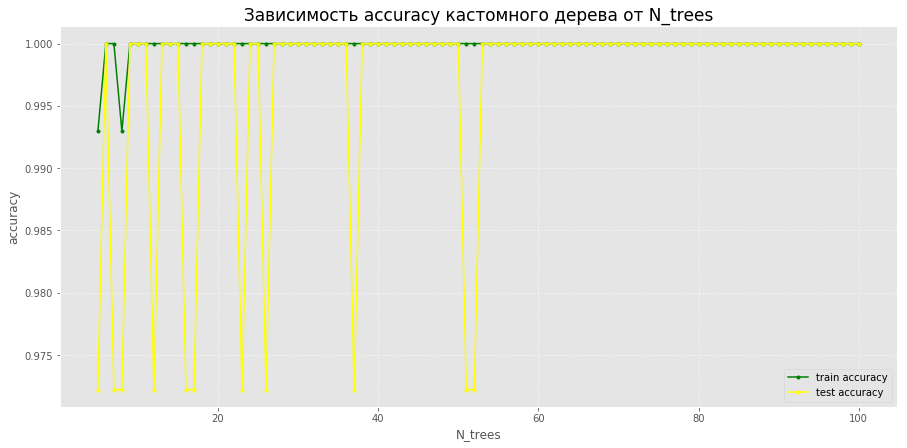

In [100]:
plt.figure(figsize=(15, 7))
plt.style.use('ggplot')


plt.xlabel('N_trees')
plt.ylabel('accuracy')
plt.title('Зависимость accuracy кастомного дерева от N_trees', size = 17)
plt.grid(ls=':')
# plt.set_ylim([0.88,1.02])

plt.plot(trees_grid, train_accuracy_custom, '.-', label = 'train accuracy', color='green')
plt.plot(trees_grid, test_accuracy_custom, '.-', label = 'test accuracy', color='yellow')


plt.legend()
plt.show()

**Вначале test_accuracy проваливается в отличие от train accuracy, но с увеличением количества деревьев в лесу accuracy выходит на единичку, что, вообще-то, очень здорово.**

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

In [101]:
trees_grid = np.arange(5, 101, 1)
test_accuracy_custom = []
test_accuracy_sklearn = []

for ntrees in trees_grid:
    cur_random_forest = RandomForest(num_trees=ntrees, max_features=int(X_train.shape[1] ** 0.5))
    cur_random_forest.fit(X_train.as_matrix(), Y_train.as_matrix())
    cur_sklearn_random_forest = RandomForestClassifier(n_estimators=ntrees, max_features=int(X_train.shape[1] ** 0.5))
    cur_sklearn_random_forest.fit(X_train.as_matrix(), Y_train.as_matrix())
    test_accuracy_custom.append(accuracy_score(Y_test, cur_random_forest.predict(X_test.as_matrix())))
    test_accuracy_sklearn.append(accuracy_score(Y_test, cur_sklearn_random_forest.predict(X_test.as_matrix())))

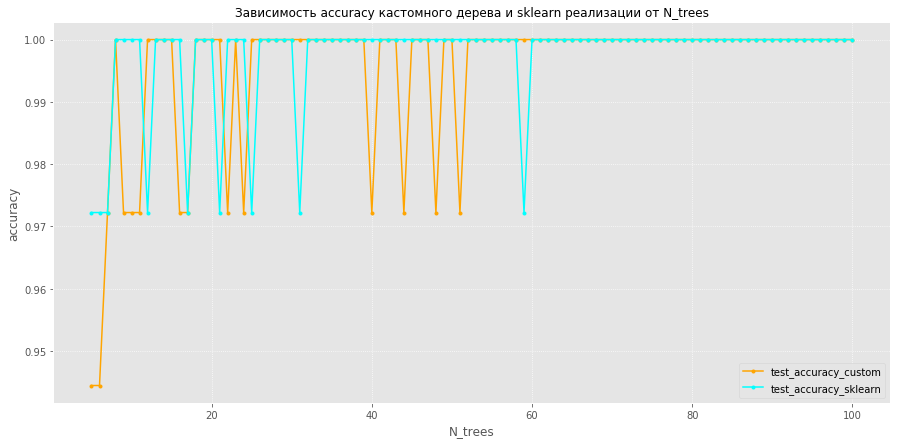

In [102]:
plt.figure(figsize=(15, 7))
plt.style.use('ggplot')


plt.xlabel('N_trees')
plt.ylabel('accuracy')
plt.title('Зависимость accuracy кастомного дерева и sklearn реализации от N_trees', size = 12)
plt.grid(ls=':')
# plt.set_ylim([0.88,1.02])

plt.plot(trees_grid, test_accuracy_custom, '.-', label = 'test_accuracy_custom', color='orange')
plt.plot(trees_grid, test_accuracy_sklearn, '.-', label = 'test_accuracy_sklearn', color='cyan')


plt.legend()
plt.show()

**Кажется, что моя реализация и реализация sklearn классифицируют примерно одинаково успешно.**

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [103]:
class RandomForestModification(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees=10, max_depth=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.criterion = criterion
        self.trees = []
        self.col_index = []
    

    def fit(self, X_train, y_train):
        for i in np.arange(self.num_trees):
            cur_sample_X, cur_sample_y = bagging(X_train, y_train, size=X_train.shape[0])
            index = np.unique(np.random.randint(X_train.shape[1], size=X_train.shape[1]))
            self.col_index.append(index)
            cur_clf = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth, max_features=None)
            cur_clf.fit(cur_sample_X[:, index], cur_sample_y)
            self.trees.append(cur_clf)
        return self
    
    
    def predict(self, X_test):
        y_pred_for_trees = np.zeros((self.num_trees, X_test.shape[0]))
        y_pred = np.zeros(X_test.shape[0])
        for i in np.arange(self.num_trees):
            y_pred_for_trees[i] = self.trees[i].predict(X_test[:, self.col_index[i]])
        for i in np.arange(X_test.shape[0]):
            y_pred[i] = Counter(y_pred_for_trees[:, i]).most_common(1)[0][0]

        return y_pred

In [104]:
trees_grid = np.arange(5, 101, 1)
test_accuracy_custom = []
test_accuracy_modif = []

for ntrees in trees_grid:
    cur_random_forest = RandomForest(num_trees=ntrees, max_features=int(X_train.shape[1] ** 0.5))
    cur_random_forest.fit(X_train.as_matrix(), Y_train.as_matrix())
    cur_random_forest_modif = RandomForestModification(num_trees=ntrees)
    cur_random_forest_modif.fit(X_train.as_matrix(), Y_train.as_matrix())
    test_accuracy_custom.append(accuracy_score(Y_test, cur_random_forest.predict(X_test.as_matrix())))
    test_accuracy_modif.append(accuracy_score(Y_test, cur_random_forest_modif.predict(X_test.as_matrix())))

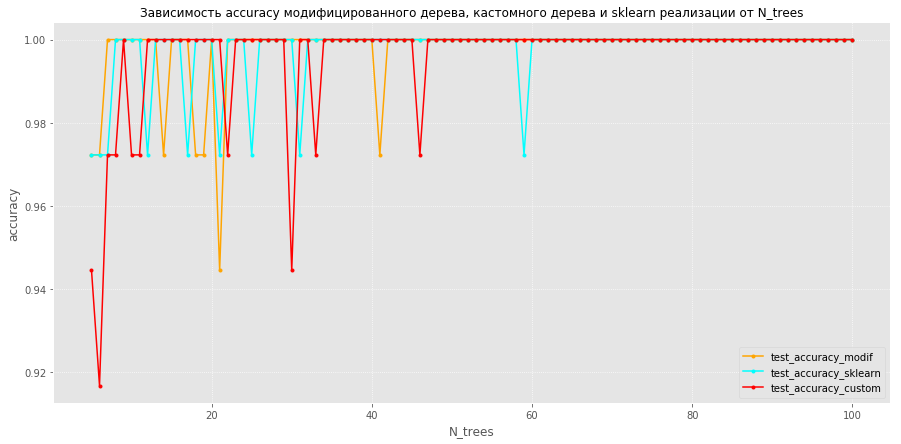

In [105]:
plt.figure(figsize=(15, 7))
plt.style.use('ggplot')


plt.xlabel('N_trees')
plt.ylabel('accuracy')
plt.title('Зависимость accuracy модифицированного дерева, кастомного дерева и sklearn реализации от N_trees', size = 12)
plt.grid(ls=':')

plt.plot(trees_grid, test_accuracy_modif, '.-', label = 'test_accuracy_modif', color='orange')
plt.plot(trees_grid, test_accuracy_sklearn, '.-', label = 'test_accuracy_sklearn', color='cyan')
plt.plot(trees_grid, test_accuracy_custom, '.-', label = 'test_accuracy_custom', color='red')




plt.legend()
plt.show()

**По идее, модифицированное дерево должно работать чуть хуже первой реализации, но на графике выше они показывают примерно одинаковые результаты.**